In [218]:
import pandas as pd
import numpy as np

from tabulate import tabulate
import zipfile
import kaggle

import re

In [219]:
!kaggle datasets download -d rashikrahmanpritom/data-science-job-posting-on-glassdoor

data-science-job-posting-on-glassdoor.zip: Skipping, found more recently modified local copy (use --force to force download)


In [220]:
zipfile_name = "data-science-job-posting-on-glassdoor.zip"

with zipfile.ZipFile(zipfile_name,"r") as file:
    file.extract("Uncleaned_DS_jobs.csv")

In [221]:
def col_order(data,col,des):
    col_index=data.columns.get_loc(des)
    data.insert(col_index,col,data.pop(col))

In [222]:
data = pd.read_csv("Uncleaned_DS_jobs.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [223]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [224]:
def check(data):
    dict={}
    for col in data.columns:
        dtype = data[col].dtypes
        valid_instances = data[col].count()
        unique = data[col].nunique()
        null_count = data[col].isnull().sum()
        duplicates = data[col].duplicated().sum()
        dict[col] = dtype,valid_instances,unique,null_count,duplicates
        data_check = pd.DataFrame(dict, index=["dtype","valid_instances","unique","sum_null","duplicates"]).T
    return data_check

check(data)

,dtype,valid_instances,unique,sum_null,duplicates
index,int64,672,672,0,0
Job Title,object,672,172,0,500
Salary Estimate,object,672,30,0,642
Job Description,object,672,489,0,183
Rating,float64,672,32,0,640
Company Name,object,672,432,0,240
Location,object,672,207,0,465
Headquarters,object,672,229,0,443
Size,object,672,9,0,663
Founded,int64,672,103,0,569


In [225]:
def check_unique(data):
    nunique=data.apply(lambda col: col.nunique())
    unique_values = data.apply(lambda col: col.unique())
    data_check = pd.DataFrame({'uni_count': nunique, 'unique_values': unique_values})
    return data_check

check_unique(data)

,uni_count,unique_values
index,672,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Job Title,172,"[Sr Data Scientist, Data Scientist, Data Scien..."
Salary Estimate,30,"[$137K-$171K (Glassdoor est.), $75K-$131K (Gla..."
Job Description,489,[Description\n\nThe Senior Data Scientist is r...
Rating,32,"[3.1, 4.2, 3.8, 3.5, 2.9, 3.9, 4.4, 3.6, 4.5, ..."
Company Name,432,"[Healthfirst\n3.1, ManTech\n4.2, Analysis Grou..."
Location,207,"[New York, NY, Chantilly, VA, Boston, MA, Newt..."
Headquarters,229,"[New York, NY, Herndon, VA, Boston, MA, Bad Ra..."
Size,9,"[1001 to 5000 employees, 5001 to 10000 employe..."
Founded,103,"[1993, 1968, 1981, 2000, 1998, 2010, 1996, 199..."


In [226]:
pd.reset_option("display.max_colwidth")

## Data Cleaning & Transformation

In [227]:
import re
pattern = r'\((.*?)\)'
data["Salary Est Ref"]=data["Salary Estimate"].apply(lambda x: re.search(pattern,x).group(1))
data["Salary Estimate"]=data["Salary Estimate"].str.replace(pattern,"",regex=True).str.strip()

In [228]:
data.drop("index",axis=1,inplace=True)

In [229]:
data.columns.to_list()

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'Salary Est Ref']

In [230]:
col_index=data.columns.get_loc('Salary Est Ref')
data.insert(2,'Salary Est Ref',data.pop('Salary Est Ref'))

In [231]:
data.columns.to_list()

['Job Title',
 'Salary Estimate',
 'Salary Est Ref',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors']

In [232]:
data.head()

,Job Title,Salary Estimate,Salary Est Ref,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K,Glassdoor est.,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K,Glassdoor est.,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K,Glassdoor est.,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K,Glassdoor est.,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K,Glassdoor est.,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [233]:
min_pattern = r'\$(.*?)K'
max_pattern = r'^\$(.*?)\$(.*?)K'

data['Min Salary ($K)']=data['Salary Estimate'].apply(lambda x: re.search(min_pattern,x).group(1)).astype("int")
data['Max Salary ($K)']=data['Salary Estimate'].apply(lambda x: re.search(max_pattern,x).group(2)).astype("int")



In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Salary Est Ref     672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
 15  Min Salary ($K)    672 non-null    int32  
 16  Max Salary ($K)    672 non

In [235]:
col_index=data.columns.get_loc('Salary Estimate')
for i,col in enumerate(["Min Salary ($K)", "Max Salary ($K)"]):
    data.insert(col_index+i,col,data.pop(col))

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Min Salary ($K)    672 non-null    int32  
 2   Max Salary ($K)    672 non-null    int32  
 3   Salary Estimate    672 non-null    object 
 4   Salary Est Ref     672 non-null    object 
 5   Job Description    672 non-null    object 
 6   Rating             672 non-null    float64
 7   Company Name       672 non-null    object 
 8   Location           672 non-null    object 
 9   Headquarters       672 non-null    object 
 10  Size               672 non-null    object 
 11  Founded            672 non-null    int64  
 12  Type of ownership  672 non-null    object 
 13  Industry           672 non-null    object 
 14  Sector             672 non-null    object 
 15  Revenue            672 non-null    object 
 16  Competitors        672 non

In [237]:
data.drop(data.iloc[:,[3]],axis=1,inplace=True)

In [238]:
data.head()

,Job Title,Min Salary ($K),Max Salary ($K),Salary Est Ref,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,137,171,Glassdoor est.,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,137,171,Glassdoor est.,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,137,171,Glassdoor est.,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,137,171,Glassdoor est.,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,137,171,Glassdoor est.,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [239]:
data["Job Description"][0]

"Description\n\nThe Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part of the broader analytics team, Data Scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. This position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.\n\nDuties & Responsibilities:\n\n• Develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains\n• Investigates, recommends, and initiates acquisition of new data resources from interna

In [240]:
import re

jd_pattern =r"\n\n"

extracted_jd = re.split(jd_pattern,data["Job Description"][0])

extracted_jd

['Description',
 'The Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part of the broader analytics team, Data Scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. This position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.',
 'Duties & Responsibilities:',
 '• Develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains\n• Investigates, recommends, and initiates acquisition of new data resources from int

In [241]:
data['Company Name']

0               Healthfirst\n3.1
1                   ManTech\n4.2
2            Analysis Group\n3.8
3                   INFICON\n3.5
4        Affinity Solutions\n2.9
                 ...            
667                TRANZACT\n3.6
668                         JKGT
669                   AccessHope
670    ChaTeck Incorporated\n5.0
671           1-800-Flowers\n2.7
Name: Company Name, Length: 672, dtype: object

In [242]:
comp_pattern = r'(\n).*$'
data['Company Name']=data['Company Name'].apply(lambda x: re.sub(comp_pattern,"",x))

In [243]:
data.head()

,Job Title,Min Salary ($K),Max Salary ($K),Salary Est Ref,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,137,171,Glassdoor est.,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,137,171,Glassdoor est.,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,137,171,Glassdoor est.,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,137,171,Glassdoor est.,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,137,171,Glassdoor est.,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [244]:
state_pattern = r'(?<=, )(.*?)$'
state_remove = r', (.*?)$'


data["State"]=data['Location'].apply(lambda x: re.search(state_pattern,x).group(1) if re.search(state_pattern,x) else np.nan)
data["Location"]=data["Location"].apply(lambda x: re.sub(state_remove,'',x) if re.sub(state_remove,'',x) else x)

data.rename({"Location":"City"},axis=1,inplace=True)

In [245]:
col_index = data.columns.get_loc("State")
data.insert(7,data.columns[col_index],data.pop(data.columns[col_index]))

In [246]:
data.head()

,Job Title,Min Salary ($K),Max Salary ($K),Salary Est Ref,Job Description,Rating,Company Name,State,City,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,137,171,Glassdoor est.,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,NY,New York,"New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,137,171,Glassdoor est.,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,VA,Chantilly,"Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,137,171,Glassdoor est.,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,MA,Boston,"Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,137,171,Glassdoor est.,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,MA,Newton,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,137,171,Glassdoor est.,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,New York,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [247]:

pattern = r'\$([\d\.]+) (?:to|\+)? \$?([\d\.]+)?'

# Extract minimum and maximum values using regular expressions
min_values = []
max_values = []
for entry in data.Revenue:
    if entry == 'Less than $1 million (USD)':
        min_val = '1'
        max_val = '1'
    elif entry == '-1':
        min_val = '-1'
        max_val = '-1'
    else:
        match = re.search(pattern, entry)
        if match:
            min_val = match.group(1)
            max_val = match.group(2) if match.group(2) else min_val
        else:
            min_val = np.nan
            max_val = np.nan
    min_values.append(min_val)
    max_values.append(max_val)

data[["Min Rev (billion $)","Max Rev (billion $)"]] = pd.DataFrame({'Min': min_values, 'Max': max_values})


In [248]:
col_index=data.columns.get_loc('Competitors')

for i,col in enumerate(["Min Rev (billion $)","Max Rev (billion $)"]):
    data.insert(col_index+i,col,data.pop(col))

In [249]:
check_unique(data)

,uni_count,unique_values
Job Title,172,"[Sr Data Scientist, Data Scientist, Data Scien..."
Min Salary ($K),26,"[137, 75, 79, 99, 90, 101, 56, 71, 91, 141, 14..."
Max Salary ($K),26,"[171, 131, 132, 109, 165, 97, 106, 123, 124, 1..."
Salary Est Ref,2,"[Glassdoor est., Employer est.]"
Job Description,489,[Description\n\nThe Senior Data Scientist is r...
Rating,32,"[3.1, 4.2, 3.8, 3.5, 2.9, 3.9, 4.4, 3.6, 4.5, ..."
Company Name,432,"[Healthfirst, ManTech, Analysis Group, INFICON..."
State,39,"[NY, VA, MA, CA, IL, MO, WA, DC, nan, TN, TX, ..."
City,204,"[New York, Chantilly, Boston, Newton, Santa Ba..."
Headquarters,229,"[New York, NY, Herndon, VA, Boston, MA, Bad Ra..."


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            672 non-null    object 
 1   Min Salary ($K)      672 non-null    int32  
 2   Max Salary ($K)      672 non-null    int32  
 3   Salary Est Ref       672 non-null    object 
 4   Job Description      672 non-null    object 
 5   Rating               672 non-null    float64
 6   Company Name         672 non-null    object 
 7   State                649 non-null    object 
 8   City                 672 non-null    object 
 9   Headquarters         672 non-null    object 
 10  Size                 672 non-null    object 
 11  Founded              672 non-null    int64  
 12  Type of ownership    672 non-null    object 
 13  Industry             672 non-null    object 
 14  Sector               672 non-null    object 
 15  Revenue              672 non-null    obj

In [251]:
for col in ["Min Rev (billion $)","Max Rev (billion $)"]:
    data[col]=data[col].astype(float)

In [252]:
data['Company Avg Rev (billion $)'] = (data['Min Rev (billion $)']+data["Max Rev (billion $)"])/2
col_order(data,'Company Avg Rev (billion $)','Competitors')

In [253]:
data.head()

,Job Title,Min Salary ($K),Max Salary ($K),Salary Est Ref,Job Description,Rating,Company Name,State,City,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min Rev (billion $),Max Rev (billion $),Company Avg Rev (billion $),Competitors
0,Sr Data Scientist,137,171,Glassdoor est.,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,NY,New York,"New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,NaN,NaN,NaN,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,137,171,Glassdoor est.,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,VA,Chantilly,"Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),1.0,2.0,1.5,-1
2,Data Scientist,137,171,Glassdoor est.,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,MA,Boston,"Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),100.0,500.0,300.0,-1
3,Data Scientist,137,171,Glassdoor est.,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,MA,Newton,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),100.0,500.0,300.0,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,137,171,Glassdoor est.,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,New York,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NaN,NaN,NaN,"Commerce Signals, Cardlytics, Yodlee"


In [254]:
avg_sal_data=(data.iloc[:,1]+data.iloc[:,2])/2

data.insert(3,'Average Salary',avg_sal_data)

In [255]:
for col in data.iloc[:,-3:-1].columns:
    data[col] = data[col].apply(lambda x: float(x))

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    672 non-null    object 
 1   Min Salary ($K)              672 non-null    int32  
 2   Max Salary ($K)              672 non-null    int32  
 3   Average Salary               672 non-null    float64
 4   Salary Est Ref               672 non-null    object 
 5   Job Description              672 non-null    object 
 6   Rating                       672 non-null    float64
 7   Company Name                 672 non-null    object 
 8   State                        649 non-null    object 
 9   City                         672 non-null    object 
 10  Headquarters                 672 non-null    object 
 11  Size                         672 non-null    object 
 12  Founded                      672 non-null    int64  
 13  Type of ownership   

In [257]:
data.head()

,Job Title,Min Salary ($K),Max Salary ($K),Average Salary,Salary Est Ref,Job Description,Rating,Company Name,State,City,...,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min Rev (billion $),Max Rev (billion $),Company Avg Rev (billion $),Competitors
0,Sr Data Scientist,137,171,154.0,Glassdoor est.,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,NY,New York,...,1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,NaN,NaN,NaN,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,137,171,154.0,Glassdoor est.,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,VA,Chantilly,...,5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),1.0,2.0,1.5,-1
2,Data Scientist,137,171,154.0,Glassdoor est.,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,MA,Boston,...,1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),100.0,500.0,300.0,-1
3,Data Scientist,137,171,154.0,Glassdoor est.,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,MA,Newton,...,501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),100.0,500.0,300.0,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,137,171,154.0,Glassdoor est.,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,New York,...,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NaN,NaN,NaN,"Commerce Signals, Cardlytics, Yodlee"


In [258]:
a=0
for i in ['excel','tableau','power bi','sql','python','aws','big data']:
    data[i] = data["Job Description"].apply(lambda x: 1 if i in x.lower() else 0)
    a+=1
print(f'Total Successful Added Cols: {a}')

Total Successful Added Cols: 7


In [259]:
data['Senior Level'] = data['Job Title'].apply(lambda x: 1 if "senior" in x.lower() else 0)

In [260]:
check(data)

,dtype,valid_instances,unique,sum_null,duplicates
Job Title,object,672,172,0,500
Min Salary ($K),int32,672,26,0,646
Max Salary ($K),int32,672,26,0,646
Average Salary,float64,672,26,0,646
Salary Est Ref,object,672,2,0,670
Job Description,object,672,489,0,183
Rating,float64,672,32,0,640
Company Name,object,672,432,0,240
State,object,649,39,23,632
City,object,672,204,0,468


In [261]:
data.head(10)

,Job Title,Min Salary ($K),Max Salary ($K),Average Salary,Salary Est Ref,Job Description,Rating,Company Name,State,City,...,Company Avg Rev (billion $),Competitors,excel,tableau,power bi,sql,python,aws,big data,Senior Level
0,Sr Data Scientist,137,171,154.0,Glassdoor est.,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,NY,New York,...,NaN,"EmblemHealth, UnitedHealth Group, Aetna",0,0,0,0,0,1,0,0
1,Data Scientist,137,171,154.0,Glassdoor est.,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,VA,Chantilly,...,1.5,-1,0,0,0,1,0,0,1,0
2,Data Scientist,137,171,154.0,Glassdoor est.,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,MA,Boston,...,300.0,-1,1,0,0,0,1,1,0,0
3,Data Scientist,137,171,154.0,Glassdoor est.,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,MA,Newton,...,300.0,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",1,0,0,1,1,1,0,0
4,Data Scientist,137,171,154.0,Glassdoor est.,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,New York,...,NaN,"Commerce Signals, Cardlytics, Yodlee",1,0,0,1,1,0,0,0
5,Data Scientist,137,171,154.0,Glassdoor est.,About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights,CA,Santa Barbara,...,NaN,-1,1,0,0,1,1,0,0,0
6,Data Scientist / Machine Learning Expert,137,171,154.0,Glassdoor est.,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis,MA,Cambridge,...,NaN,-1,0,0,0,0,1,0,0,0
7,Data Scientist,137,171,154.0,Glassdoor est.,Introduction\n\nHave you always wanted to run ...,3.5,iRobot,MA,Bedford,...,1.5,-1,0,0,0,1,1,0,0,0
8,Staff Data Scientist - Analytics,137,171,154.0,Glassdoor est.,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data,CA,San Diego,...,3.5,"Square, PayPal, H&R Block",0,0,0,0,0,0,0,0
9,Data Scientist,137,171,154.0,Glassdoor est.,Ready to write the best chapter of your career...,3.6,XSELL Technologies,IL,Chicago,...,NaN,-1,0,0,0,1,1,0,0,0


In [262]:
title_sort_data=data["Job Title"].apply(lambda x: "data scientist" if "data scientist" in x.lower() else ("analyst" if "analyst" in x.lower() else ("data engineer" if "data engineer" in x.lower() else ("director/manager" if "director" in x.lower() or "manager" in x.lower() else 'Other'))))
data.insert(0,'Title Sorted',title_sort_data)

In [263]:
data[data['Title Sorted']=='data engineer']

,Title Sorted,Job Title,Min Salary ($K),Max Salary ($K),Average Salary,Salary Est Ref,Job Description,Rating,Company Name,State,...,Company Avg Rev (billion $),Competitors,excel,tableau,power bi,sql,python,aws,big data,Senior Level
34,data engineer,Data Engineer,75,131,103.0,Glassdoor est.,Chef Software is the industry leader in IT aut...,3.6,Chef,NaN,...,75.0,"Puppet, Ansible, SaltStack",1,0,0,1,0,1,1,0
53,data engineer,Jr. Data Engineer,75,131,103.0,Glassdoor est.,Jr. Data Engineer\n\nJob Details\nLevel\nEntry...,4.8,IT Concepts,NaN,...,17.5,-1,1,0,0,1,0,0,0,0
65,data engineer,Data Engineer,79,131,105.0,Glassdoor est.,POSITION SUMMARY\n\n\nThe candidate will be jo...,3.7,Bayview Asset Management,FL,...,300.0,-1,0,0,0,1,1,0,0,0
70,data engineer,Data Engineer (Remote),79,131,105.0,Glassdoor est.,IZEA was built to connect the world’s top bran...,4.2,IZEA,FL,...,37.5,"Linqia, Collective Bias",1,0,0,1,1,1,0,0
76,data engineer,"Data Engineer, Enterprise Analytics",79,131,105.0,Glassdoor est.,Description\n\nThe Data Engineer on the Enterp...,3.1,Healthfirst,NY,...,NaN,"EmblemHealth, UnitedHealth Group, Aetna",1,0,0,1,1,0,1,0
82,data engineer,Data Engineer,79,131,105.0,Glassdoor est.,"Job Description\n\nWhy consider OPI, and why d...",4.7,Object Partners,MO,...,37.5,"Solution Design Group, Intertech (Minnesota)",0,0,0,1,0,1,1,0
106,data engineer,Sr Data Engineer (Sr BI Developer),99,132,115.5,Glassdoor est.,Description/Responsibilities\n\n\nResponsible ...,3.2,Tivity Health,AZ,...,NaN,-1,0,0,0,1,0,0,1,0
107,data engineer,Data Engineer,99,132,115.5,Glassdoor est.,Who we are:\n\nhc1 is focused on improving liv...,2.9,hc1,IN,...,17.5,-1,0,0,0,1,1,1,0,0
113,data engineer,Data Engineer,99,132,115.5,Glassdoor est.,"At Phantom AI, experience the fast paced envir...",5.0,Phantom AI,CA,...,NaN,-1,0,0,0,0,1,0,0,0
119,data engineer,Data Engineer,99,132,115.5,Glassdoor est.,OPPORTUNITY:\n\nGetWellNetwork is searching fo...,4.8,GetWellNetwork,MD,...,75.0,"Epic, CipherHealth",0,0,0,1,1,0,0,0


In [264]:
data['State'].isnull().sum()

23

In [265]:
data['State'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', nan, 'TN', 'TX',
       'PA', 'AZ', 'WI', 'GA', 'FL', 'NE', 'KS', 'NH', 'NJ', 'LA', 'OH',
       'IN', 'MD', 'CO', 'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA',
       'MN', 'OK', 'CT', 'NC', 'DE', 'Anne Arundel, MD', 'WV'],
      dtype=object)

In [266]:
pattern = r'^.*?, '
data['State']=data['State'].apply(lambda x: re.sub(pattern,'',x) if isinstance(x,str) else x)

In [267]:
data['State'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', nan, 'TN', 'TX',
       'PA', 'AZ', 'WI', 'GA', 'FL', 'NE', 'KS', 'NH', 'NJ', 'LA', 'OH',
       'IN', 'MD', 'CO', 'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA',
       'MN', 'OK', 'CT', 'NC', 'DE', 'WV'], dtype=object)

In [268]:
data["HQ Same State"] = data.apply(lambda row: 1 if isinstance(row['State'], str) and row['State'] in row['Headquarters'] else 0, axis=1)


In [269]:
data.head()

,Title Sorted,Job Title,Min Salary ($K),Max Salary ($K),Average Salary,Salary Est Ref,Job Description,Rating,Company Name,State,...,Competitors,excel,tableau,power bi,sql,python,aws,big data,Senior Level,HQ Same State
0,data scientist,Sr Data Scientist,137,171,154.0,Glassdoor est.,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,NY,...,"EmblemHealth, UnitedHealth Group, Aetna",0,0,0,0,0,1,0,0,1
1,data scientist,Data Scientist,137,171,154.0,Glassdoor est.,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,VA,...,-1,0,0,0,1,0,0,1,0,1
2,data scientist,Data Scientist,137,171,154.0,Glassdoor est.,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,MA,...,-1,1,0,0,0,1,1,0,0,1
3,data scientist,Data Scientist,137,171,154.0,Glassdoor est.,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,MA,...,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",1,0,0,1,1,1,0,0,0
4,data scientist,Data Scientist,137,171,154.0,Glassdoor est.,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,...,"Commerce Signals, Cardlytics, Yodlee",1,0,0,1,1,0,0,0,1


In [270]:
data.drop('Competitors',axis=1,inplace=True)

In [271]:
data.columns.to_list()

['Title Sorted',
 'Job Title',
 'Min Salary ($K)',
 'Max Salary ($K)',
 'Average Salary',
 'Salary Est Ref',
 'Job Description',
 'Rating',
 'Company Name',
 'State',
 'City',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Min Rev (billion $)',
 'Max Rev (billion $)',
 'Company Avg Rev (billion $)',
 'excel',
 'tableau',
 'power bi',
 'sql',
 'python',
 'aws',
 'big data',
 'Senior Level',
 'HQ Same State']

In [272]:
from datetime import datetime

data['Company Age'] = datetime.today().year - data['Founded']

col_order(data,'Company Age','Type of ownership')


In [273]:
data.to_csv('Cleaned_DS_jobs.csv',sep=',')

## Exploratory Data Analysis

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import warnings
warnings.filterwarnings(action='ignore')

import sqlite3

In [275]:
cnn = sqlite3.connect('glassdoor_sql.db')

In [276]:
%load_ext sql
%sql sqlite:///glassdoor_sql.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [277]:
%%sql

DROP TABLE IF EXISTS glassdoor

 * sqlite:///glassdoor_sql.db
Done.


[]

In [278]:
data.to_sql('glassdoor',cnn)

672

In [279]:
%%sql

select "Title Sorted", Count(*) as total_jobs from glassdoor
    GROUP BY "Title Sorted"
    Order By total_jobs DESC

 * sqlite:///glassdoor_sql.db
Done.


Title Sorted,total_jobs
data scientist,455
Other,105
analyst,55
data engineer,47
director/manager,10


In [280]:
%%sql

select "Title Sorted", AVG("Rating") as average_rating from glassdoor
    GROUP BY "Title Sorted"
    ORDER BY average_rating DESC

 * sqlite:///glassdoor_sql.db
Done.


Title Sorted,average_rating
data engineer,4.027659574468085
director/manager,3.91
analyst,3.7636363636363637
Other,3.7285714285714286
data scientist,3.379340659340659


In [281]:
data.columns

Index(['Title Sorted', 'Job Title', 'Min Salary ($K)', 'Max Salary ($K)',
       'Average Salary', 'Salary Est Ref', 'Job Description', 'Rating',
       'Company Name', 'State', 'City', 'Headquarters', 'Size', 'Founded',
       'Company Age', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Min Rev (billion $)', 'Max Rev (billion $)',
       'Company Avg Rev (billion $)', 'excel', 'tableau', 'power bi', 'sql',
       'python', 'aws', 'big data', 'Senior Level', 'HQ Same State'],
      dtype='object')

In [282]:
%%sql
With analyst_cte(rating,salary) AS
(SELECT "Rating", "Average Salary" FROM glassdoor WHERE "Title Sorted" = "analyst")

SELECT "Job Title", "Min Salary ($K)", "Max Salary ($K)",
       "Average Salary", "Salary Est Ref", "Rating", "Company Name", "State",
       "City", "HQ Same State", "Size", "Founded", "Type of ownership",
       "Industry", "Sector", "Revenue", "excel", "tableau", "power bi", "sql",
       "python"
    FROM glassdoor
WHERE "Title Sorted" = "analyst"
AND "Rating" > (SELECT AVG(rating) FROM analyst_cte)
AND "Average Salary" > (SELECT AVG(salary) FROM analyst_cte)
AND "Senior Level" = 0
AND "aws" = 0
AND "big data" = 0
ORDER BY "Average Salary" DESC, "Rating" DESC
LIMIT 10;

 * sqlite:///glassdoor_sql.db
Done.


Job Title,Min Salary ($K),Max Salary ($K),Average Salary,Salary Est Ref,Rating,Company Name,State,City,HQ Same State,Size,Founded,Type of ownership,Industry,Sector,Revenue,excel,tableau,power bi,sql,python
Analytics - Business Assurance Data Analyst,145,225,185.0,Employer est.,4.6,GreatAmerica Financial Services,IA,Cedar Rapids,1,501 to 1000 employees,1992,Company - Private,Lending,Finance,$100 to $500 million (USD),1,1,0,1,0
"Health Plan Data Analyst, Sr",145,225,185.0,Employer est.,3.8,Cook Children's Health Care System,TX,Fort Worth,1,5001 to 10000 employees,1918,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),0,0,0,0,0
Data Analyst,141,225,183.0,Glassdoor est.,4.5,ShorePoint,VA,Reston,0,1 to 50 employees,2017,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,1,1,1,1,0
Clinical Data Analyst,128,201,164.5,Glassdoor est.,3.8,NYSTEC,NY,New York,1,51 to 200 employees,1996,Nonprofit Organization,Consulting,Business Services,$25 to $50 million (USD),0,0,0,1,1
Analytics - Business Assurance Data Analyst,124,198,161.0,Glassdoor est.,4.6,GreatAmerica Financial Services,IA,Cedar Rapids,1,501 to 1000 employees,1992,Company - Private,Lending,Finance,$100 to $500 million (USD),1,1,0,1,0
Data Analyst II,137,171,154.0,Glassdoor est.,4.2,"Insight Enterprises, Inc.",TX,Plano,0,5001 to 10000 employees,1988,Company - Public,Enterprise Software & Network Solutions,Information Technology,$5 to $10 billion (USD),1,0,0,0,0
Enterprise Data Analyst (Enterprise Portfolio Management Office),138,158,148.0,Glassdoor est.,3.9,Navy Federal Credit Union,VA,Merrifield,1,10000+ employees,1933,Other Organization,Banks & Credit Unions,Finance,Unknown / Non-Applicable,0,1,1,1,0
Data Analyst,122,146,134.0,Glassdoor est.,3.9,Nolij Consulting,VA,Falls Church,1,51 to 200 employees,2012,Company - Public,Consulting,Business Services,$1 to $5 million (USD),1,1,0,1,1


In [283]:
data['Title Sorted'].value_counts(ascending=False)

Title Sorted
data scientist      455
Other               105
analyst              55
data engineer        47
director/manager     10
Name: count, dtype: int64

In [284]:
fig=px.bar(data['State'].value_counts(ascending=False), title='DS Job Popularity by State')

fig.update_yaxes(title_text='Frequency')
fig.update_layout(showlegend=False)

California (CA) is by far the most prevalent state in the job list for data science. This is especially true for the fact that its status has long been established as a global tech hub, housing major technology companies such as Google, Facebook, and Apple. 

The state's vibrant startup ecosystem, coupled with prestigious academic institutions like Stanford University and UC Berkeley, fosters a talent pool of skilled professionals. 

Additionally, California's diverse economy spans industries like healthcare, finance, and entertainment, all of which leverage data science for innovation and growth. Networking opportunities further enhance the appeal of California for data scientists, making it a sought-after destination for career advancement in the field.

Another state that is only second to CA is Virginia, located in the southeastern region of the US. Even though the popularity on the Glassdoor platform regarding data jobs is only half of CA's, the state holds great promise of being the second kernel for data jobs due to its growing tech industry, proximity to Washington D.C., strong education system, diverse economy, and high quality of life

In [285]:
data.sort_values('Min Salary ($K)',ascending=False)

,Title Sorted,Job Title,Min Salary ($K),Max Salary ($K),Average Salary,Salary Est Ref,Job Description,Rating,Company Name,State,...,Company Avg Rev (billion $),excel,tableau,power bi,sql,python,aws,big data,Senior Level,HQ Same State
527,data scientist,Data Scientist,212,331,271.5,Glassdoor est.,Description\n\nThe Data Scientist will be part...,2.7,1-800-Flowers,NY,...,1.5,1,1,0,1,1,0,0,0,1
517,data scientist,Data Scientist,212,331,271.5,Glassdoor est.,JOB DESCRIPTION:\n\nHexagon US Federal is look...,2.7,Hexagon US Federal,MD,...,NaN,1,0,0,0,0,1,0,0,0
528,data scientist,Data Scientist,212,331,271.5,Glassdoor est.,Aptive is seeking a Data Scientist to compile ...,3.5,Aptive,DC,...,37.5,1,1,1,1,1,0,0,0,0
509,data scientist,"Real World Science, Data Scientist",212,331,271.5,Glassdoor est.,"Title: Real World Science, Data Scientist\nLoc...",4.0,AstraZeneca,DE,...,NaN,0,0,0,1,1,0,0,0,0
510,data scientist,Data Scientist,212,331,271.5,Glassdoor est.,Position: Data Scientist\nLocation: Denver\nSt...,3.6,Creative Circle,NaN,...,NaN,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,data scientist,Data Scientist,31,56,43.5,Glassdoor est.,Company overview:\nFor more than three decades...,2.9,"Pragmatics, Inc.",NaN,...,300.0,0,0,0,0,1,1,0,0,0
484,Other,Decision Scientist,31,56,43.5,Glassdoor est.,Are you passionate about Decision Science?\n\n...,4.5,Johns Hopkins University Applied Physics Labor...,MD,...,1.5,1,0,0,0,0,0,0,0,1
485,data scientist,Data Scientist,31,56,43.5,Glassdoor est.,Join us in making roads safer by making driver...,4.9,Cambridge Mobile Telematics,MA,...,NaN,0,0,0,0,1,1,0,0,1
486,data scientist,Data Scientist - TS/SCI FSP or CI Required,31,56,43.5,Glassdoor est.,US Citizenship Required and (TS/SCI with FSP o...,5.0,Phoenix Operations Group,MD,...,3.0,0,0,0,0,1,0,1,0,1


In [286]:
avg_sal=data.groupby('State')[['Average Salary']].mean()
max_sal=data.groupby('State')[['Max Salary ($K)']].max()

avg_max_merged = avg_sal.merge(max_sal, how='inner', left_index=True, right_index=True).sort_values('Average Salary', ascending=False)


fig=px.bar(avg_max_merged,barmode='group',
           color_discrete_sequence=['grey', 'lightblue'],
           template='plotly_dark')

fig.update_layout(
    width= 1300,
    height = 500
)
fig.update_yaxes(title_text='Salary')

Noticeably, with the maximum salary obtainable being around $331k, many states share the trait in common. However, it is only the state of Delaware in the US that shares the same annual rate for both average and maximum ones, sumultaneously at the highest rate.

In [287]:
data[data['State']=='DE']['Average Salary'].count()

1

The situation occurs since there is only one job offer for DE. For more justified comparison, we are going to sort out States with negligible job offers

In [288]:
%%sql

SELECT State, AVG("Average Salary") as avg_sal, MAX("Max Salary ($K)") as max_sal FROM glassdoor
GROUP BY State
HAVING COUNT(State) > 1
ORDER BY avg_sal DESC
LIMIT 10;

 * sqlite:///glassdoor_sql.db
Done.


State,avg_sal,max_sal
NC,150.11111111111111,331
WI,144.41666666666666,225
AZ,140.875,198
IA,140.83333333333334,225
DC,139.5,331
NY,136.43269230769232,331
TX,136.05882352941177,331
WA,134.78125,331
OR,132.0,201
NH,132.0,198


In [289]:
state_comp_list = data['State'].value_counts()[data['State'].value_counts()>=2].index

avg_max_state=data[data['State'].isin(state_comp_list)].groupby('State').agg({'Average Salary':'mean','Max Salary ($K)':'max'})
avg_max_state.rename(columns={'Max Salary($K)':'Highest Offer'},inplace=True)

fig=px.bar(avg_max_state.sort_values('Average Salary',ascending=False),barmode='group',
           color_discrete_sequence=['grey', 'lightblue'],
           template='plotly_dark')

fig.update_layout(
    width= 1300,
    height = 500
)
fig.update_yaxes(title_text='Salary')

After filtering out states with only one job posting, there were noticeable changes in the results. The average salaries for every state seemed to be on par with each other, indicating similar compensation levels across the board, particularly after removing Delaware (DE) as an outlier. 

However, North Carolina (NC) emerged as the most promising location for job seekers, boasting a slightly higher average salary and the highest maximum salary compared to other states.

In [303]:
avg_age_rev=data[data['Founded']!=-1].groupby('State').agg({'Company Age':'mean','Company Avg Rev (billion $)':'mean'}).sort_values('Company Age',ascending=True)

fig=px.bar(data_frame=avg_age_rev,title='Average Company Age and Revenue by State',orientation='h',barmode='group')

fig.update_xaxes(title='Average Age & Rev')
fig.update_layout(showlegend=True,
                  height=1000,
                  width=800)
fig.show()

In [ ]:
data[data['Founded']!=-1][['State','Average Salary','Industry','Company Name','Founded','Company Age']].sort_values('Company Age',ascending=False).head(5)

,State,Average Salary,Industry,Company Name,Founded,Company Age
51,MA,103.0,Biotech & Pharmaceuticals,Takeda,1781,243
365,MA,114.0,Biotech & Pharmaceuticals,Takeda,1781,243
300,VA,183.0,State & Regional Agencies,State of Virginia,1788,236
266,MD,120.5,Biotech & Pharmaceuticals,US Pharmacopeia,1820,204
321,VA,185.0,Biotech & Pharmaceuticals,GSK,1830,194


In [ ]:
data.columns

Index(['Title Sorted', 'Job Title', 'Min Salary ($K)', 'Max Salary ($K)',
       'Average Salary', 'Salary Est Ref', 'Job Description', 'Rating',
       'Company Name', 'State', 'City', 'Headquarters', 'Size', 'Founded',
       'Company Age', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Min Rev (billion $)', 'Max Rev (billion $)', 'excel', 'tableau',
       'power bi', 'sql', 'python', 'aws', 'big data', 'Senior Level',
       'HQ Same State'],
      dtype='object')

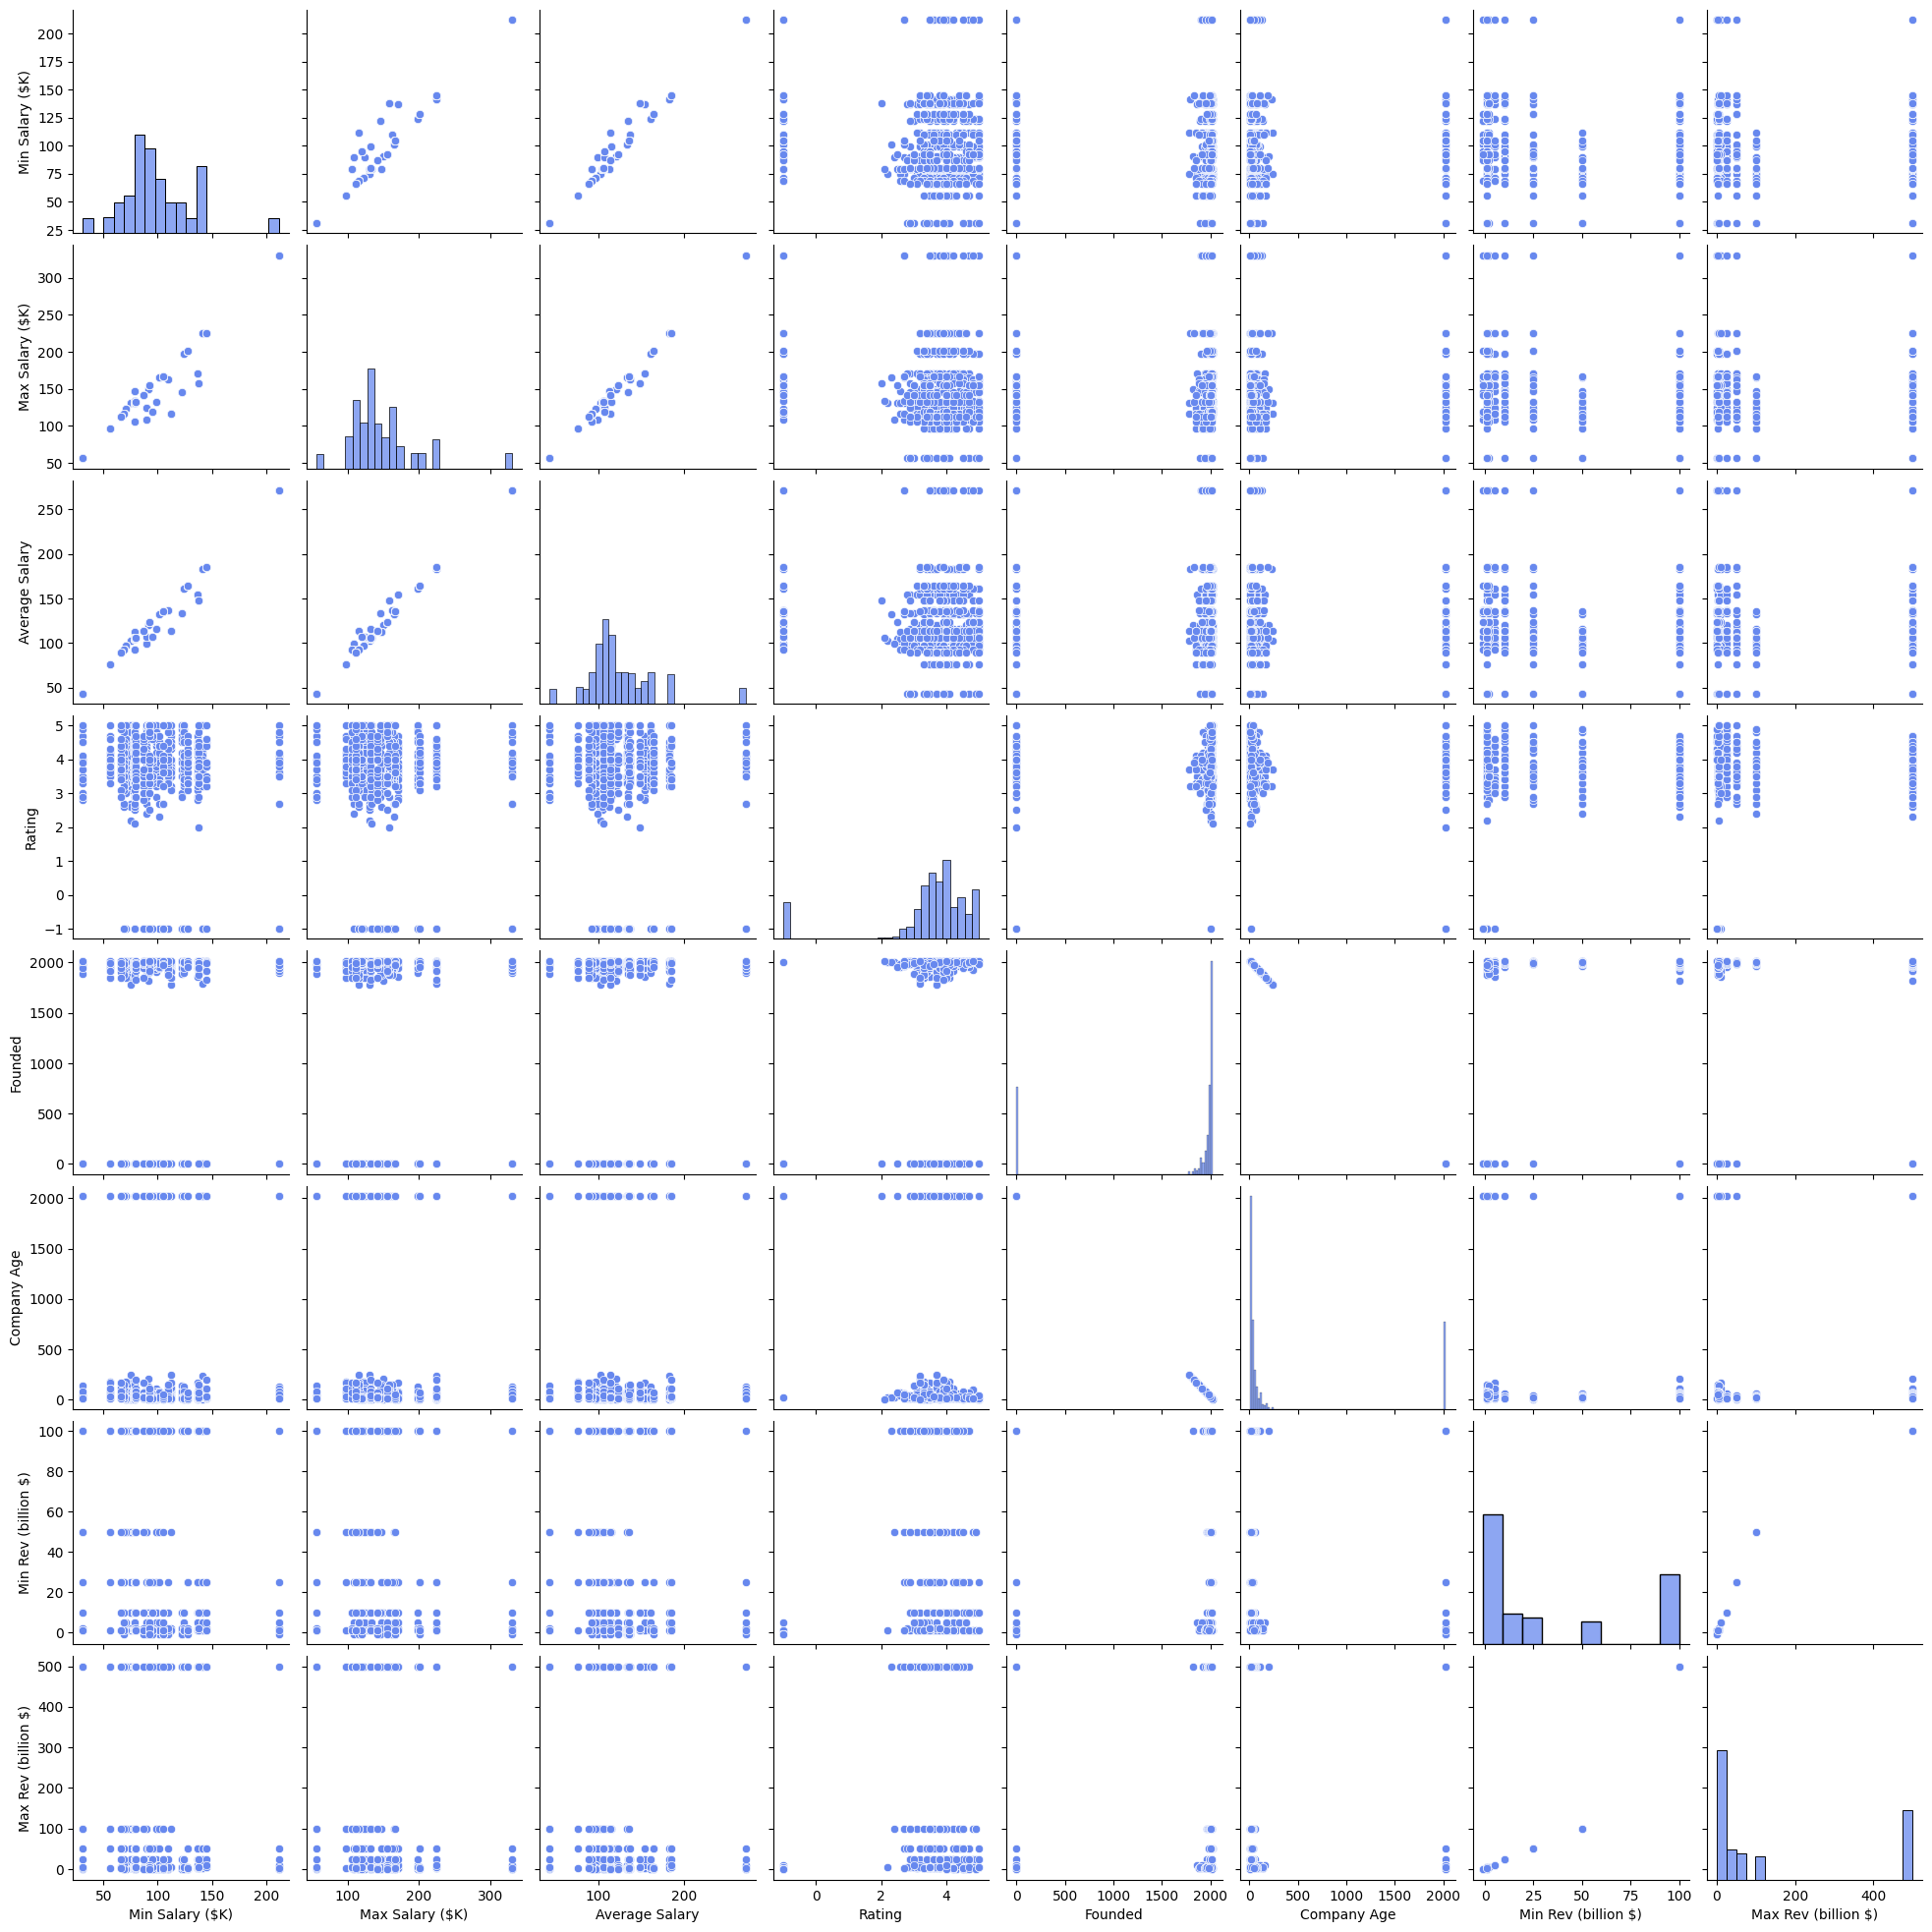

In [ ]:
sns.set_palette('coolwarm')
sns.pairplot(data.drop(['excel', 'tableau',
       'power bi', 'sql', 'python', 'aws', 'big data', 'Senior Level',
       'HQ Same State'],axis=1))

In [ ]:
import os

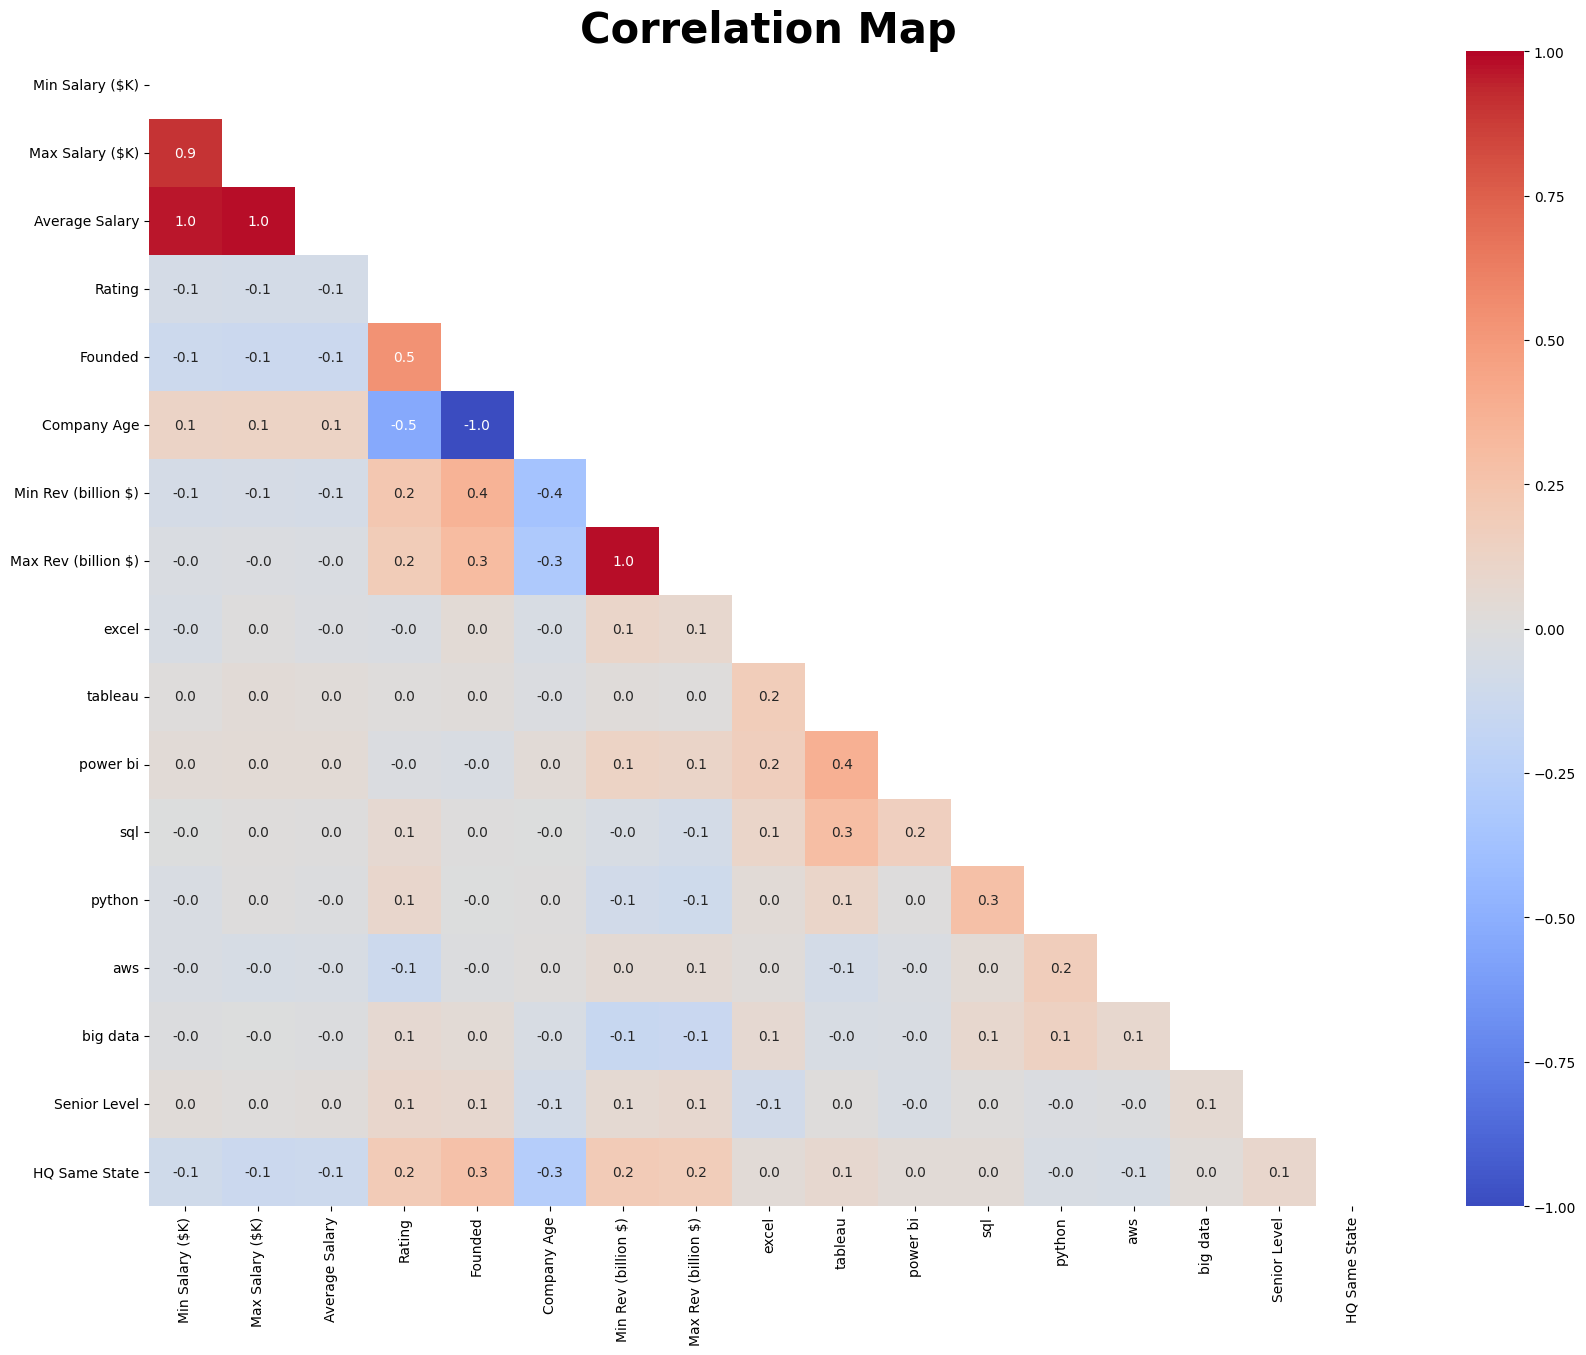

In [ ]:
plt.figure(figsize=(20,15))
matrix = np.triu(data.select_dtypes(include=np.number).corr())
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='coolwarm')

plt.title('Correlation Map',fontsize=30, fontweight='bold')

save_folder = r'D:\Study\UNIVERSITY\OTHER COURSES\random coding\Portfolio Projects\000. GITHUB\DS-Job-Postings-Glassdoor-Data-Preprocessing-Project\Analytic Figures'
filepath = os.path.join(save_folder,'Attributes Correlation.png')
plt.savefig(filepath)

The analysis reveals a lack of clear correlation among the attributes examined, notably between job ratings and offered salaries, as well as between company age and compensation. Interestingly, lower ratings are observed for companies with longer operating histories.

In [ ]:
fig=px.bar(data['Industry'].value_counts(),color=data['Industry'].value_counts().index,
           title='DS Job Popularity by Industry',color_discrete_sequence=px.colors.qualitative.T10)

fig.update_layout(
    height=600,
    width=1000
)
fig.update_yaxes(title='Frequency')
fig.update_layout(
    legend=dict(
        itemwidth=30
    )
)


In [ ]:
fig=px.bar(data['Sector'].value_counts(),color=data['Sector'].value_counts().index,title='DS Job Popularity by Sector')

fig.update_layout(
    height=600,
    width=1000
)
fig.update_yaxes(title='Frequency')
fig.update_layout(
    legend=dict(
        itemwidth=30
    )
)


Even though Biotech & Pharmaceutical industry offers the highest number of positions for data enthusiast, the sector of it witnesses merely one third of the most dominant one, which is Information Technology with nearly 190 jobs available for application

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

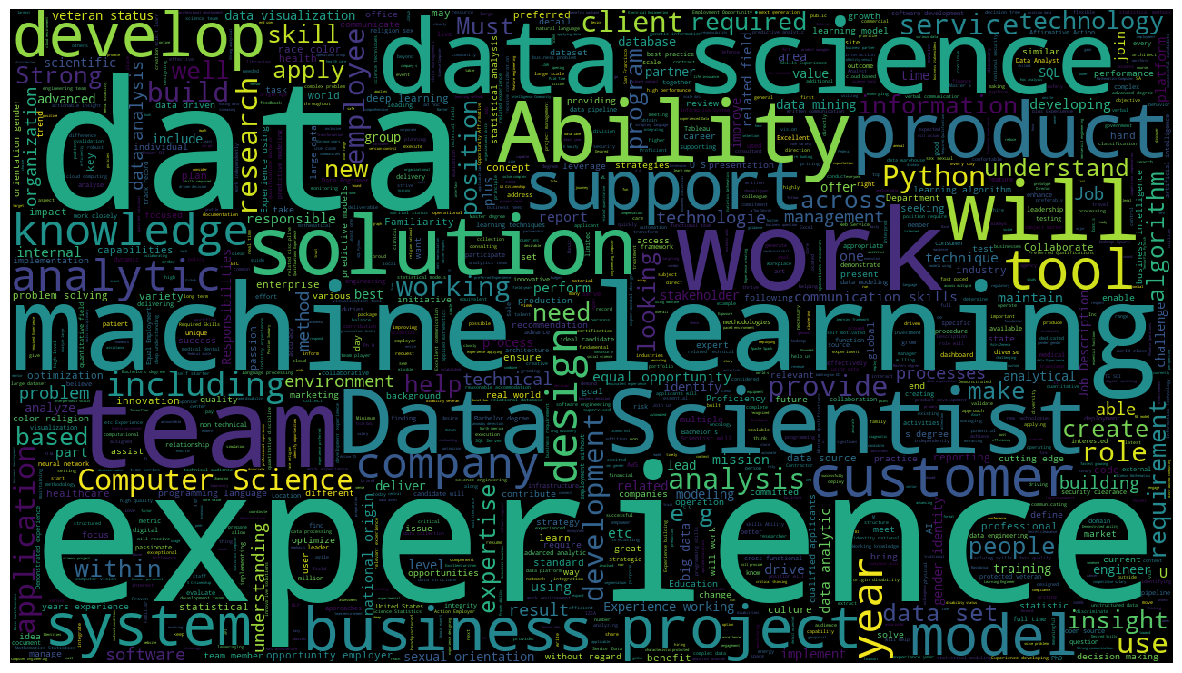

<Figure size 640x480 with 0 Axes>

In [ ]:
words = " ".join(data['Job Description'])
wordcloud = WordCloud(max_words=5000, width =1280, height = 720, background_color="black").generate(words)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="nearest")
plt.axis('off')
plt.show()

filepath=os.path.join(save_folder,'Job Description - Most Common Terms')
plt.savefig(filepath)

In [ ]:
data['HQ Same State'].count()

672

# Key Insights & Conclusion:

In conclusion, there are a number of inferrence from the analysis procedures executed above:
- Glassdoor is an ideal job posting platform for data enthusiast and pursuer with nearly 700 jobs currently available<br><br>
- However, occupations are restricted within the United States, most of which belong to enterprises sharing the same headquarters with their posted working location<br><br>
- In terms of data positions, the platform is apparently most suitable for data scientist specifically with a whopping number of 455 jobs. Trailing this figure is the count for data analysis and enginerring position in exchange for the highest average rating received (over 4 stars) <br><br>
- The decision on which to apply is highly subject to one's preference or priority, which can be categorized as follows:
    + For **`Salary`**: Delaware (DE) and North Carolina (NC) are substantiatively the most ideal places for those putting compensation on the pedestal, whereas Alabama (AL) should be avoided herein as its average salary is mediocre yet the maximum offer is fairly low ($165k) as compared to other states. With that being said, the former two are supposed to be very competitive, especially in Delaware (DE), where only one position is currently open for application. <br><br>
    + For **`Experience`**, the following top 5 places should be taken into consideration, namely Delaware(DE), Wisconsin(WI), Connecticut(CT), New Hampshire(NH), Ohio(OH), or probably Tennessee(TN) with respectively 111, 100 down to around 90 years of operations. These places comprise of the most established enterprises which have the potential to be masters of conventional techniques (well-established methods of operations and R&D) as well as value cocreation <br><br>
    + For **`Highly Applicable Knowledge`**, firms in states like AL, SC, AZ and IA, despite being relatively younger to the playground, have already acquired great revenue record for the latest year (around 300 billion dollars). Even comapanies with below 20 years of establishment in OR or RI have gained corresponding revenues. These can be attributed to their sensitivity to state-of-the-art business approaches and technological application. <br><br>
    + For **`Industries`**: Those who pursue the background of Biotech & Pharmaceuticals would gain a competitive advantage when using this platform for job seeking <br> <br>

><strong><i>All in all, regardless of what your preferences/priorities are, practical experience accompanied with data & machine learning knowledge are undoubtedly most demanded aspects for successful job acquisition</i></strong>